6. Ensemble Learning - Gradient Boosting

In [7]:
import pandas as pd

# Load DATASET
df = pd.read_csv('test.csv')
print(df.head())

                                               tweet label
0  The CDC currently reports 99031 deaths. In gen...  real
1  States reported 1121 deaths a small rise from ...  real
2  Politically Correct Woman (Almost) Uses Pandem...  fake
3  #IndiaFightsCorona: We have 1524 #COVID testin...  real
4  Populous states can generate large case counts...  real


In [2]:
# ImportING THE  libraries
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
train_data = pd.read_csv('train_split.csv')
val_data = pd.read_csv('val_split.csv')
test_data = pd.read_csv('test_split.csv')

# Initialize the TF-IDF Vectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000)  #  max_features set to 5000

# Fit and transform the training data to obtain TF-IDF vectors
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data['processed_text'])

# Transform the validation and test data using the same fitted vectorizer
X_val_tfidf = tfidf_vectorizer.transform(val_data['processed_text'])
X_test_tfidf = tfidf_vectorizer.transform(test_data['processed_text'])

# Optionally, check the shape of the transformed data
print(f"TF-IDF Training Data Shape: {X_train_tfidf.shape}")
print(f"TF-IDF Validation Data Shape: {X_val_tfidf.shape}")
print(f"TF-IDF Test Data Shape: {X_test_tfidf.shape}")

TF-IDF Training Data Shape: (8480, 5000)
TF-IDF Validation Data Shape: (1060, 5000)
TF-IDF Test Data Shape: (1060, 5000)


In [4]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

ENSEMBLE

In [5]:
y_train = train_data['label']  # Assuming 'label' is the column with 0: fake, 1: real
y_val = val_data['label']
y_test = test_data['label']

# Initialize Gradient Boosting model
gb_model = GradientBoostingClassifier()

# Define hyperparameter grid
param_grid = {
    'n_estimators': [100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1],  # Step size shrinkage
    'max_depth': [3, 5]  # Maximum depth of individual trees
}

# Perform GridSearchCV
grid_search = GridSearchCV(gb_model, param_grid, cv=3, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_tfidf, y_train)

# Best model
best_gb = grid_search.best_estimator_

# Predictions
y_pred = best_gb.predict(X_test_tfidf)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f'Gradient Boosting Accuracy: {accuracy:.4f}')
print(classification_report(y_test, y_pred))

Gradient Boosting Accuracy: 0.9019
              precision    recall  f1-score   support

        fake       0.90      0.89      0.89       496
        real       0.90      0.92      0.91       564

    accuracy                           0.90      1060
   macro avg       0.90      0.90      0.90      1060
weighted avg       0.90      0.90      0.90      1060



TO GENERATE CONFUSION MATRIX

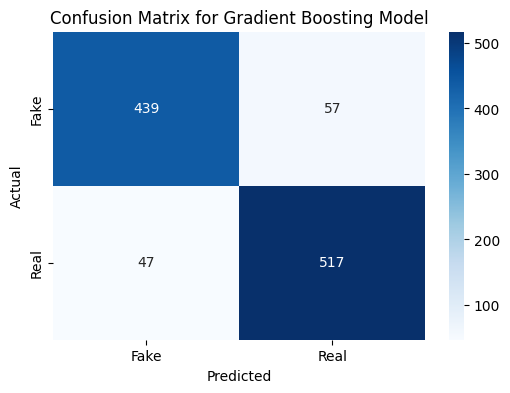

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
# Display
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for Gradient Boosting Model')
plt.show()
